In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City Data
cityfile = pd.read_csv(city_data)
cityfile.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
cityfile.count()

city            120
driver_count    120
type            120
dtype: int64

In [3]:
# Read the Ride Data  
ridefile = pd.read_csv(ride_data)
ridefile1 = ridefile.drop_duplicates("city")
ridefile1.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
ridefile.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [5]:
ridefile1.count()

city       120
date       120
fare       120
ride_id    120
dtype: int64

In [6]:
# Combine the data into a single dataset
# Display the data table for preview 

pyberfile = pd.merge(ridefile, cityfile, on="city")
pyberfile1 = pd.merge(ridefile1, cityfile, on="city")
pyberfile1.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [7]:
# Create a dataframe for the analysis

ride_numbers = ridefile.groupby("city")["ride_id"].count()

avrg_fare = round(ridefile.groupby("city")["fare"].mean(), 1)

driver_count = cityfile.set_index("city")["driver_count"]

city_type = cityfile.set_index("city")["type"]


pyberpd = pd.DataFrame({"Average Fare" : avrg_fare, 
                        "Number of Rides" : ride_numbers,
                        "City Type" : city_type,
                        "Driver Count" : driver_count})
pyberpd.head()

,Average Fare,Number of Rides,City Type,Driver Count
Amandaburgh,24.6,18,Urban,12
Barajasview,25.3,22,Urban,26
Barronchester,36.4,16,Suburban,11
Bethanyland,33.0,18,Suburban,22
Bradshawfurt,40.1,10,Rural,7


## Bubble Plot of Ride Sharing Data

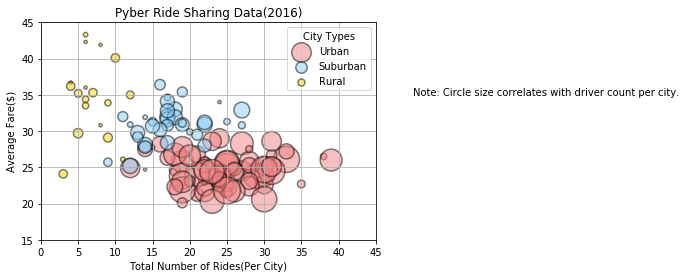

In [8]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

urban = pyberpd.loc[pyberpd["City Type"]=="Urban"]

suburban = pyberpd.loc[pyberpd["City Type"]=="Suburban"]

rural = pyberpd.loc[pyberpd["City Type"]=="Rural"]


plt.scatter(urban["Number of Rides"], urban["Average Fare"],color="lightcoral", 
            edgecolor="black", s=urban["Driver Count"]*10, label="Urban", 
            alpha=0.5, linewidth=1.5)

plt.scatter(suburban["Number of Rides"], suburban["Average Fare"],color="lightskyblue", 
            edgecolor="black", s=suburban["Driver Count"]*10, label="Suburban", 
            alpha=0.5, linewidth=1.5)

plt.scatter(rural["Number of Rides"], rural["Average Fare"],color="gold", 
            edgecolor="black", s=rural["Driver Count"]*10, label="Rural", 
            alpha=0.5, linewidth=1.5)

plt.xlim(0, 45)
plt.ylim(15, 45)
plt.grid()

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.text(50,35, "Note: Circle size correlates with driver count per city.")

plt.legend(loc="upper right", title="City Types")
plt.savefig("ridesharing.png")
plt.show()


## Total Fares by City Type

In [9]:
# Calculate Type Percents

city_fare = pyberfile.groupby("type")["fare"].sum()
city_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

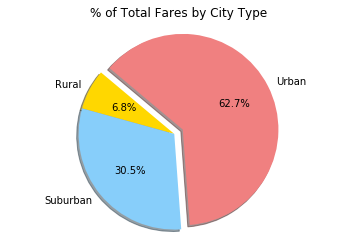

In [10]:
# Build Pie Chart
# Save Figure

type_fare = pyberfile.groupby("type")["fare"].sum()

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]

plt.title("% of Total Fares by City Type")

plt.pie(type_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("totalfare.png")
plt.show()


## Total Rides by City Type

In [11]:
# Calculate Ride Percents

type_ride = pyberfile.groupby("type")["ride_id"].count()
type_ride


type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

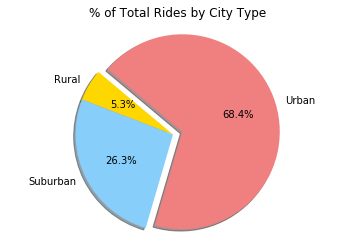

In [12]:
# Build Pie Chart
# Save Figure

type_ride = pyberfile.groupby("type")["ride_id"].count()

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]

plt.title("% of Total Rides by City Type")

plt.pie(type_ride, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("totalride.png")
plt.show()


## Total Drivers by City Type

In [13]:
# Calculate Driver Percents

type_drivers = cityfile.groupby("type")["driver_count"].sum()
type_drivers


type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

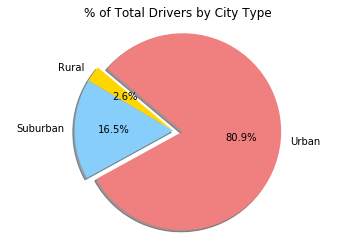

In [14]:
# Build Pie Chart
# Save Figure

type_drivers = cityfile.groupby("type")["driver_count"].sum()

labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = [0,0,0.1]

plt.title("% of Total Drivers by City Type")

plt.pie(type_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.savefig("totaldriver.png")
plt.show()
